<a href="https://colab.research.google.com/github/xtenix88/Data-Portfolio/blob/main/sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
files =  [ file for file in os.listdir('/content/sales_data')]

print(files)

# for file in files:
#   print(file)

['Sales_July_2019.csv', 'Sales_September_2019.csv', 'Sales_November_2019.csv', 'Sales_April_2019.csv', 'Sales_December_2019.csv', 'Sales_August_2019.csv', 'Sales_March_2019.csv', 'Sales_June_2019.csv', 'Sales_February_2019.csv', 'Sales_October_2019.csv', 'Sales_January_2019.csv', 'Sales_May_2019.csv']


In [ ]:
all_months_data = pd.DataFrame()

for file in files:
  df = pd.read_csv('/content/sales_data/' + file)
  all_months_data = pd.concat([all_months_data,df])

all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"


In [ ]:
all_months_data.shape

(186850, 6)

In [ ]:
all_months_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

Add month column

In [ ]:
all_data = all_months_data.copy()

In [ ]:
all_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
Month               545
dtype: int64

In [ ]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,NaN,NaN,NaN,NaN,NaN,NaN,NaN
599,NaN,NaN,NaN,NaN,NaN,NaN,NaN
675,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1027,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
16133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16175,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16191,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16379,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
all_data = all_data.dropna(how='all')

Find 'or' and delete so we can convert to int32

In [31]:
all_data[all_data['Month'].str.contains('Or')]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
775,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1391,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1438,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1624,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1720,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
14291,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
15419,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
15963,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
16234,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [32]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301",07
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101",07
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",07
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",07
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",07
...,...,...,...,...,...,...,...
16630,209916,Bose SoundSport Headphones,1,99.99,05/08/19 19:15,"235 Center St, Seattle, WA 98101",05
16631,209917,Wired Headphones,1,11.99,05/24/19 22:02,"926 9th St, San Francisco, CA 94016",05
16632,209918,AAA Batteries (4-pack),2,2.99,05/24/19 17:44,"868 Hickory St, Boston, MA 02215",05
16633,209919,USB-C Charging Cable,1,11.95,05/04/19 12:46,"204 Adams St, Seattle, WA 98101",05


In [42]:
all_data['Month'] = all_data['Month'].astype('int32')


In [48]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])  #make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])#make float

In [49]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [50]:
all_data.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,print,Sales
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00,150.00
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00,300.00
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84,3.84
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84,3.84
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,2.99,14.95
5,222915,Bose SoundSport Headphones,1,99.99,07/03/19 18:30,"899 Elm St, San Francisco, CA 94016",7,99.99,99.99
6,222916,Google Phone,1,600.00,07/21/19 22:39,"745 Chestnut St, New York City, NY 10001",7,600.00,600.00
7,222917,LG Dryer,1,600.00,07/17/19 13:44,"490 Adams St, New York City, NY 10001",7,600.00,600.00
8,222918,USB-C Charging Cable,1,11.95,07/14/19 21:16,"207 1st St, Los Angeles, CA 90001",7,11.95,11.95
9,222919,Lightning Charging Cable,1,14.95,07/14/19 13:24,"29 Jefferson St, Dallas, TX 75001",7,14.95,14.95


24742     1
3228      1
3227      1
3226      1
3225      1
         ..
8350     12
8349     12
8348     12
8370     12
23589    12
Name: Month, Length: 185950, dtype: int32

**Question 1: What was the month with the highest sales and how much is that sales?**


In [59]:
sales_sum = all_data.groupby('Month').sum()
sales_sum

,Quantity Ordered,Price Each,print,Sales
Month,,,,
1,10903,1.811768e+06,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.084992e+06,2.097560e+06


<function matplotlib.pyplot.show>

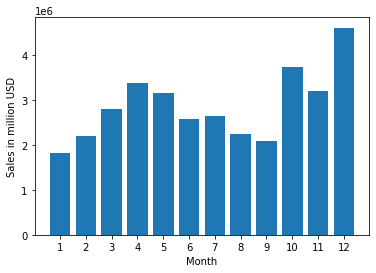

In [61]:
months = range(1,13)
plt.bar(months, sales_sum['Sales'] )
plt.xticks(months)
plt.ylabel('Sales in million USD')
plt.xlabel('Month')
plt.show

Add a city column

In [78]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1] + ' ' + x.split(',')[2].split(' ')[1]) #split and grab the city first, then state without the zip code at the ned
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,print,Sales,City
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00,150.00,Atlanta GA
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00,300.00,Seattle WA
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84,3.84,Atlanta GA
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84,3.84,Atlanta GA
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,2.99,14.95,Seattle WA
